In [7]:
import copy
import random
import numpy as np

from matplotlib import pyplot

In [56]:
class SortingNetwork():
    comparators = []
    seen = set()

    def objective(self, comps):
        return len(comps)

    def genPair(self, m, n):
        for i in range(m, n):
            for j in range(m, n):
                if i == j:
                    continue
                self.comparators.append((i, j))

    def __init__(self, arr) -> None:
        self.genPair(0, len(arr))
        self.arr = arr

    def sort(self, comps):
        if comps is None:
            comps = self.comparators
        arr = copy.deepcopy(self.arr)
        for x, y in comps:
            if x > y and arr[x] < arr[y]:
                arr[x], arr[y] = arr[y], arr[x]
            if x < y and arr[x] > arr[y]:
                arr[x], arr[y] = arr[y], arr[x]
        return arr

    def simulated_annealing(self, n_iterations, temp):
        best = self.comparators
        comps = copy.deepcopy(self.comparators)
        best_eval = self.objective(comps)
        curr, curr_eval = best, best_eval
        scores = []
        for i in range(n_iterations):
            selection = random.randint(0, len(comps)-1)
            pop = comps.pop(selection)
            candidate = comps
            candidate_eval = self.objective(comps)
            if candidate_eval < best_eval and sorted(self.arr) == self.sort(candidate):
                best, best_eval = candidate, candidate_eval
                scores.append(best_eval)
                print('new best')
            if sorted(self.arr) != self.sort(candidate):
                comps.append(pop)
            diff = candidate_eval - curr_eval
            t = temp / float(i + 1)
            metropolis = np.exp(-diff / t)
            if diff > 0 or np.random.rand() < metropolis:
                # store the new current point
                curr, curr_eval = candidate, candidate_eval
        return [best, best_eval, scores]

In [57]:
arr = [10,9,8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
new best
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


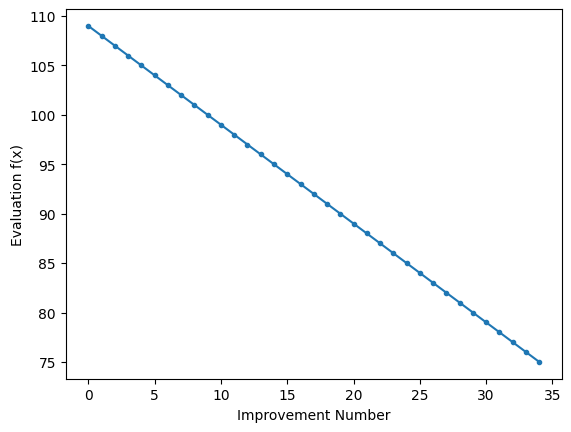

In [64]:
arr = network.sort(None)
print(arr)
best, score, scores = network.simulated_annealing(100, 10)
print(network.sort(best))

pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()